<a href="https://colab.research.google.com/github/PAWA007/Image-classification-using-cnn/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
classes = ['airplane','automobile','bird','cat','dog','deer','frog','horse','ship','truck']

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
def plotsample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

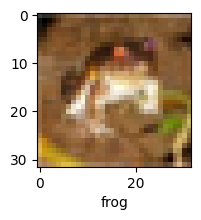

In [12]:
plotsample(x_train, y_train, 0)


In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [17]:
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [18]:
ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2289 - accuracy: 0.5607
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2067 - accuracy: 0.5704
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1956 - accuracy: 0.5736
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1876 - accuracy: 0.5758
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1807 - accuracy: 0.5776
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1738 - accuracy: 0.5815
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1688 - accuracy: 0.5827
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1625 - accuracy: 0.5846
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1575 - accuracy: 0.5865
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.152

In [19]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4093 - accuracy: 0.5142


[1.4092743396759033, 0.51419997215271]

In [24]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.4499 - accuracy: 0.4799
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0857 - accuracy: 0.6218
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9515 - accuracy: 0.6670
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8574 - accuracy: 0.7011
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7807 - accuracy: 0.7274
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7142 - accuracy: 0.7496
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6575 - accuracy: 0.7707
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6000 - accuracy: 0.7888
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5555 - accuracy: 0.8059
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.50

In [32]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9685 - accuracy: 0.6964


[0.9685152173042297, 0.696399986743927]

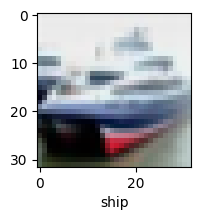

In [33]:
plotsample(x_test, y_test, 1)

In [36]:
y_pred = cnn.predict(x_test)
y_pred[:5] 

313/313 [==============================] - 1s 2ms/step


array([[2.76802629e-02, 1.14565322e-04, 1.30443834e-03, 7.15903342e-01,
        1.33822346e-02, 1.79805636e-01, 5.93932718e-02, 1.94971228e-03,
        3.75305041e-04, 9.12646501e-05],
       [3.73449147e-04, 1.16914302e-01, 1.22300980e-06, 3.04555647e-06,
        1.06922027e-08, 1.64820690e-08, 2.40104683e-08, 7.90085219e-10,
        8.74752164e-01, 7.95578863e-03],
       [8.19162000e-03, 6.94755018e-02, 5.75041689e-04, 1.71004387e-03,
        2.17661698e-04, 1.37901181e-04, 3.08252493e-05, 7.90082704e-05,
        8.89667869e-01, 2.99145635e-02],
       [9.91036534e-01, 6.74089779e-06, 1.39169872e-03, 4.86414137e-05,
        1.08772516e-03, 1.77573861e-06, 1.86690579e-06, 3.15367914e-04,
        6.07791916e-03, 3.17437989e-05],
       [1.76471289e-07, 1.29039312e-04, 5.48338145e-02, 6.63968772e-02,
        7.57609963e-01, 2.35615158e-03, 1.18649654e-01, 9.36701235e-06,
        1.28826023e-05, 2.06648929e-06]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred] 

In [38]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [40]:
classes[y_classes[4]]

'dog'

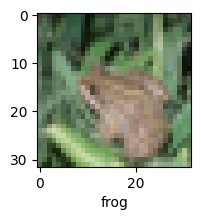

In [41]:
plotsample(x_test, y_test, 4)

In [42]:
classes[y_classes[1]]

'ship'

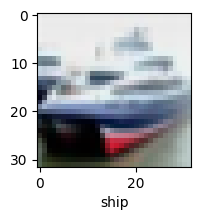

In [43]:
plotsample(x_test, y_test, 1)

1/1 [==============================] - 0s 82ms/step
cat


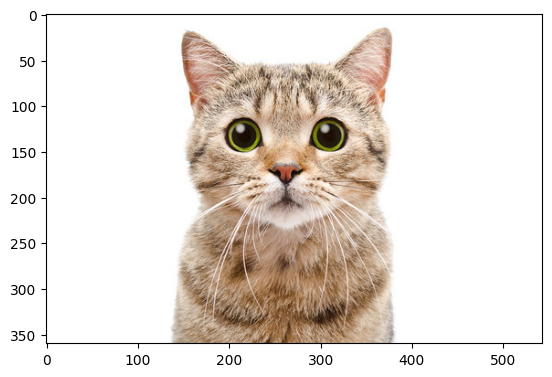

In [47]:
from numpy.ma.extras import in1d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

classes = ['airplane','automobile','bird','cat','dog','deer','frog','horse','ship','truck']

i1 = image.imread("/content/cat.jpg")
img = i1/255
newi1 = resize(i1,(32,32,3),)
im = np.expand_dims(newi1, axis = 0)
plt.imshow(img)
keypoints = cnn.predict(im)
print(classes[np.argmax(keypoints)])

1/1 [==============================] - 0s 19ms/step
airplane


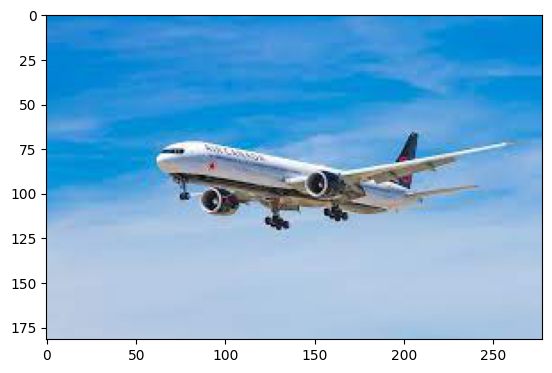

In [48]:
i1 = image.imread("/content/aeroplane.jpeg")
img = i1/255
newi1 = resize(i1,(32,32,3),)
im = np.expand_dims(newi1, axis = 0)
plt.imshow(img)
keypoints = cnn.predict(im)
print(classes[np.argmax(keypoints)])